In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
df = pd.read_csv('austin_weather.csv')
df.head()


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [3]:
df = df.drop(columns=['Date', 'Events'])


In [4]:
df = df.replace('T', 0)
df = df.replace('-', np.nan)


In [5]:
df = df.dropna()


In [6]:
df = df.astype(float)


In [7]:
X = df.drop(columns=['PrecipitationSumInches'])
y = df['PrecipitationSumInches']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.22106091287108165
RMSE: 0.2643907525728475


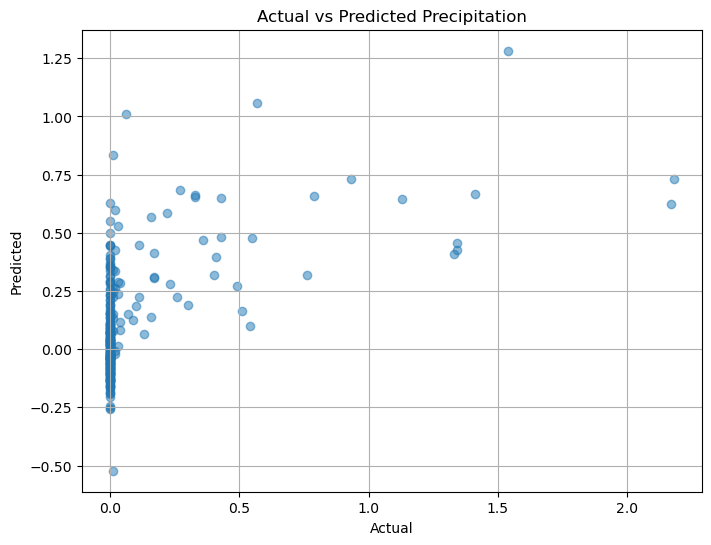

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Precipitation")
plt.grid(True)
plt.show()


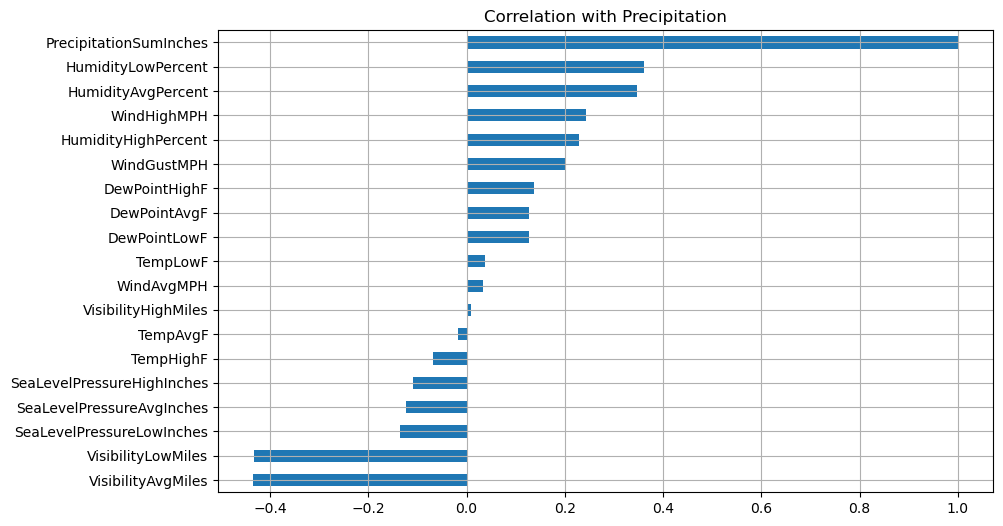

In [12]:
plt.figure(figsize=(10,6))
df.corr()['PrecipitationSumInches'].sort_values().plot(kind='barh')
plt.title("Correlation with Precipitation")
plt.grid(True)
plt.show()
